In [1]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
!unzip -q cats_and_dogs_filtered.zip


--2025-07-12 04:36:31--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.212.207, 108.177.12.207, 173.194.215.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.212.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   126MB/s    in 0.5s    

2025-07-12 04:36:32 (126 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = 'cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
    validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(
    train_generator, steps_per_epoch=100, epochs=5,
    validation_data=validation_generator, validation_steps=50)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.5040 - loss: 0.8229 - val_accuracy: 0.5980 - val_loss: 0.6825
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.5752 - loss: 0.6818 - val_accuracy: 0.5620 - val_loss: 0.6781
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.5803 - loss: 0.6742 - val_accuracy: 0.5890 - val_loss: 0.6565
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step - accuracy: 0.6576 - loss: 0.6088 - val_accuracy: 0.6070 - val_loss: 0.6544
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.7278 - loss: 0.5476 - val_accuracy: 0.6860 - val_loss: 0.6346


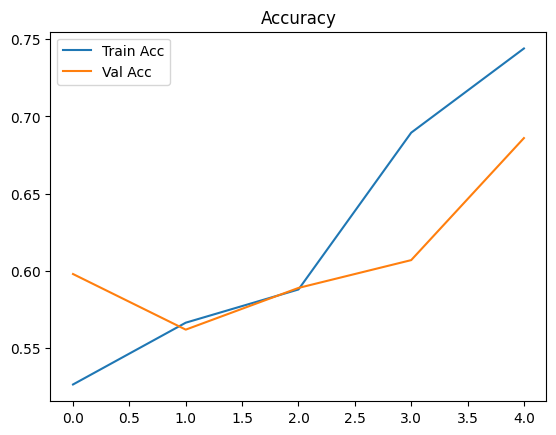

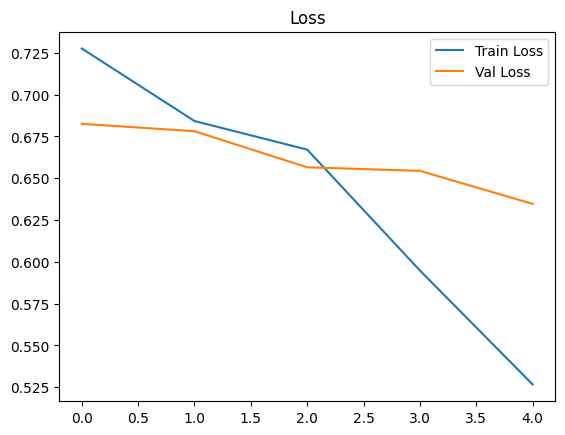

In [4]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, label='Train Acc')
plt.plot(epochs, val_acc, label='Val Acc')
plt.legend()
plt.title("Accuracy")
plt.show()

plt.plot(epochs, loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Val Loss')
plt.legend()
plt.title("Loss")
plt.show()
